In [14]:
import tensorflow as tf

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './cats_and_dogs_filtered/train',
    target_size = (150,150),
    shuffle=True,
    batch_size = 128,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    './cats_and_dogs_filtered/validation',
    target_size = (150,150),
    shuffle=True,
    batch_size = 128,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


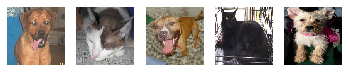

In [16]:
image, _ = next(train_generator)

for j in range(5):
    plt.subplot(1,5,j + 1)
    plt.axis('off')
    plt.imshow(image[j])
 
 

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,3, padding = 'same',input_shape = (150,150, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3, padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,3, padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [ ]:
model.fit_generator(train_generator,
                    
                    epochs=50,
                    validation_data = test_generator,
                    )


Epoch 1/50
16/16 [==============================] - 80s 5s/step - loss: 0.8545 - accuracy: 0.4960 - val_loss: 0.6905 - val_accuracy: 0.5020
Epoch 2/50
16/16 [==============================] - 77s 5s/step - loss: 0.6870 - accuracy: 0.5325 - val_loss: 0.6881 - val_accuracy: 0.5410
Epoch 3/50
16/16 [==============================] - 76s 5s/step - loss: 0.6694 - accuracy: 0.5650 - val_loss: 0.6636 - val_accuracy: 0.5860
Epoch 4/50
16/16 [==============================] - 80s 5s/step - loss: 0.6535 - accuracy: 0.5945 - val_loss: 0.6405 - val_accuracy: 0.6210
Epoch 5/50
16/16 [==============================] - 78s 5s/step - loss: 0.6372 - accuracy: 0.6140 - val_loss: 0.6311 - val_accuracy: 0.6260
Epoch 6/50
16/16 [==============================] - 78s 5s/step - loss: 0.6053 - accuracy: 0.6620 - val_loss: 0.6240 - val_accuracy: 0.6520
Epoch 7/50
16/16 [==============================] - 81s 5s/step - loss: 0.5654 - accuracy: 0.7050 - val_loss: 0.5970 - val_accuracy: 0.6730
Epoch 8/50
16/16 [==